# ml-template-2

This notebook serves as a template for common traditional ML workflows.

**How to Use**
1. In Load data, input location of raw csv file.
1. Set target column name in section Main.
1. Edit preprocessing steps in preprocessing_workflow() in scripts/data_prep.py. If no preprocessing, set as_is=True in section Main/Prep data

**Principles**
1. extensible
1. easy to use
1. fits to sklearn paradigm


In [ ]:
target = 'target'

## Imports

In [ ]:
import pandas as pd
from sklearn.pipeline import Pipeline

import sys
sys.path.insert(0,'../scripts/')

# from importlib import reload
# reload(sys.modules['settings'])
# reload(sys.modules['data_prep'])
# reload(sys.modules['eda'])
# reload(sys.modules['modelling'])

<module 'modelling' from 'scripts/modelling.py'>

## Load data

In [ ]:
from sklearn.datasets import load_boston, load_diabetes
import numpy as np

data = load_boston()
raw = pd.DataFrame(data.data, columns=data.feature_names)
raw['target'] = pd.Series(data.target)
print(raw.shape)
raw.head(3)

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


## Prep data

In [ ]:
from data_prep import preprocess
df = preprocess(raw, target = target, as_is = True)
df.head(2)

Set problem_type to regression.


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


In [ ]:
!cat scripts/settings.py


# Data prep parameters ----
target = 'target'
categorical_features = []
numerical_features = ['LSTAT', 'PTRATIO', 'DIS', 'RM', 'TAX', 'NOX', 'CHAS', 'B', 'INDUS', 'CRIM', 'AGE', 'RAD', 'ZN']
features = categorical_features + numerical_features
problem_type = 'regression'

CAT_FILL = "Missing"
NUM_FILL = 0

SEED = 42


# Modelling parameters ----

import numpy as np

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'log2']
# Criterion for split importance: Gini impurity or information gain
if problem_type == 'classification':
    criterion = ['gini', 'entropy']
else:
    criterion = ['mse']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_sam

## Explore Data

In [ ]:
from eda import check_nulls_and_outliers, correlations_to_label

Total rows: 506
Variables with missing values:
Empty DataFrame
Columns: [count, mean, std, min, max]
Index: []
Variables with outliers:


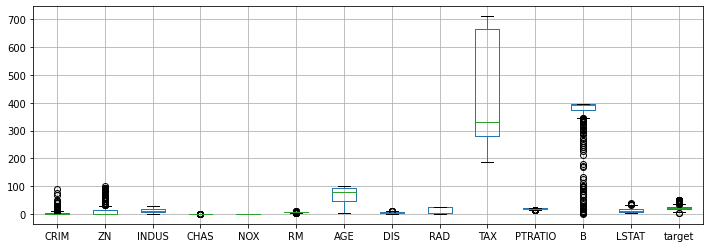

In [ ]:
check_nulls_and_outliers(df)

In [ ]:
# correlations_to_label(df, label = target)

## Model

In [ ]:
from modelling import get_best_model, train, predict, evaluate, clfs

### Split train test

In [ ]:
df = df.sample(frac = 1, random_state = 42)
train_df = df.iloc[0:500,]
test_df = df.iloc[-100:,]

### Fit 1 split model

In [ ]:
clf = clfs[0]
print(clf)
clf = train(clf, train_df, train_size = 0.8)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)
Model results on validation set:
{'correlation': 0.9383753166094442, 'r2': 0.8805482348218746, 'mae': 2.258479999999999, 'rmse': 3.389151156263171}
Saved model file to model.pkl


### Cross validate across multiple splits

In [ ]:
# clf = get_best_model(train_df)
# print(clf)

## Predict

In [ ]:
y_pred = predict(test_df, clf)
y_true = test_df[target]
evaluate(y_true, y_pred)

{'correlation': 0.987754060222426,
 'mae': 0.9077799999999988,
 'r2': 0.9756580834858879,
 'rmse': 1.3584796943642525}